<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Compare-against-PRECISE" data-toc-modified-id="Compare-against-PRECISE-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Compare against PRECISE</a></span><ul class="toc-item"><li><span><a href="#Identify-new-components" data-toc-modified-id="Identify-new-components-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Identify new components</a></span><ul class="toc-item"><li><span><a href="#Component-11" data-toc-modified-id="Component-11-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Component 11</a></span></li></ul></li><li><span><a href="#Investigate-component-weightings" data-toc-modified-id="Investigate-component-weightings-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Investigate component weightings</a></span></li></ul></li></ul></div>

**This notebook is only relevant if you are appending E. coli data to PRECISE**

# Setup

In [2]:
import sys
sys.path.append('../')
from icaviz.plotting import *
from tqdm import tqdm_notebook as tqdm

In [3]:
DATA_DIR = '../data/precise2_data/'
PRECISE_DIR = '../data/precise_data/'
GENE_DIR = '../data/annotation/'

In [4]:
component_info_df = pd.read_csv(DATA_DIR + 'component_info.csv', index_col=0)
precise2 = load_data(X=DATA_DIR+'log_tpm_qc.csv',
                     S=DATA_DIR+'S.csv',
                     A=DATA_DIR+'A.csv',
                     metadata=DATA_DIR+'metadata_qc.csv',
                     annotation=GENE_DIR+'gene_info.csv',
                     trn=GENE_DIR+'TRN.csv',
                     cutoff = 525, names=component_info_df['name']) # Get correct cut-off score from 3_estimate_thresholds

../icaviz/load.py:350: UserWarning: Genes missing annotations: b0012, b0056, b0057, b4726, b4727, b4728, b4710, b4709, b4729, b0282, b4730, b0322, b4731, b4732, b0470_1, b0470_2, b0470_3, b0484_1, b0484_2, b0484_3, b0502, b4733, b0562, b4734, b4581, b4735, b4736, b4723, b4737, b4490, b1142, b1149, b4738, b4739, b4491, b4521, b4740, b1228, b4573, b4711, b4741, b4742, b1318, b4524, b4743, b4744, b4493, b4745, b1459, b1470, b1471, b4746, b4747, b1506, b4696, b1543, b4748, b4749, b4724, b4750, b4534, b4494, b4751, b4752, b4495, b4496, b2092, b2115, b2139, b4604, b4605, b4725, b2641, b4644, b2649, b2681, b4610, b2850, b2854, b2855, b2858, b2862, b4753, b4754, b2941, b4658, b4755, b3036, b4756, b3268, b3423, b4612, b4660, b4615, b3643, b3681, b3682, b4757, b4488, b3777, b3782, b3808, b4038, b4583, b4223, b4575, b4308, b4720, b4721, b4722, b4715, b4584
  warnings.warn('Genes missing annotations: {}'.format(missing_genes))


In [5]:
enrich = pd.read_csv(PRECISE_DIR+'curated_enrichments.csv')
names = enrich['name'].tolist()
precise = load_data(X=PRECISE_DIR+'log_tpm.csv',
                     S=PRECISE_DIR+'S.csv',
                     A=PRECISE_DIR+'A.csv',
                     metadata=PRECISE_DIR+'metadata.csv',
                     annotation=GENE_DIR+'gene_info.csv',
                     trn=GENE_DIR+'TRN.csv',
                     cutoff = 550,names=names)

# Compare against PRECISE

In [6]:
dot,links = compare_ica(precise.S,precise2.S,cutoff=0.3)

You may either view the comparison in the Jupyter notebook, or save it to a png

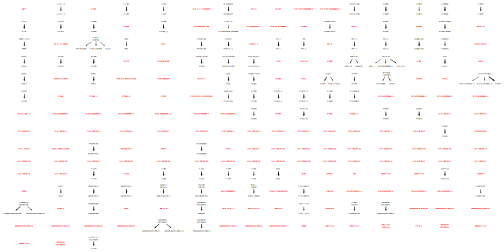

In [7]:
dot

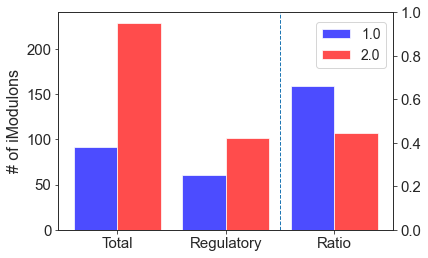

In [8]:
sns.set_style('ticks')

precise1_total = enrich.shape[0]
precise1_reg_total = enrich[~enrich.Regulator.isna()].shape[0]

precise2_total = component_info_df.shape[0]
precise2_reg_total = component_info_df[~component_info_df.Regulator.isna()].shape[0]

_, ax = plt.subplots()

ax.bar(1.4, precise1_reg_total, color='b', alpha=0.7, label='1.0', width=0.2)
ax.bar(1.6, precise2_reg_total, color='r', alpha=0.7, label='2.0', width=0.2)
ax.bar(0.9, precise1_total, color='b', alpha=0.7, width=0.2)
ax.bar(1.1, precise2_total, color='r', alpha=0.7, width=0.2)

ax.set_xticks([1, 1.5, 2])
ax.set_xticklabels(['Total', 'Regulatory', 'Ratio'])

ax.tick_params(axis='both', labelsize=15)
ax.set_ylabel('# of iModulons', fontsize=16)

ax2 = ax.twinx()

ax2.bar(1.9, precise1_reg_total/precise1_total, color='b', alpha=0.7, width=0.2)
ax2.bar(2.1, precise2_reg_total/precise2_total, color='r', alpha=0.7, width=0.2)
ax2.set_ylim(0, 1)
ax2.tick_params(axis='both', labelsize=15)

ax2.axvline(1.75, linewidth=1, linestyle='--')

ax.legend(fontsize=14, bbox_to_anchor=(1, 0.85), loc='center right')

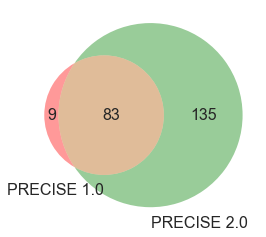

In [18]:
precise_names = precise.names
precise2_names = precise2.names
precise2_names = [str(i) for i in precise2_names]
precise_both, precise2_both = zip(*links)
precise_unique = list(set(precise_names).difference(set(precise_both)))
precise2_unique = list(set(precise2_names).difference(set(precise2_both)))

_, ax = plt.subplots()
venn = venn2(
    subsets=(len(precise_unique), len(precise2_unique), len(set(precise_both))),
    set_labels=['PRECISE 1.0', 'PRECISE 2.0']
)
for text in venn.subset_labels:
    text.set_fontsize(16)
for text in venn.set_labels:
    text.set_fontsize(16)

### PRECISE 1.0 Lost and Found|

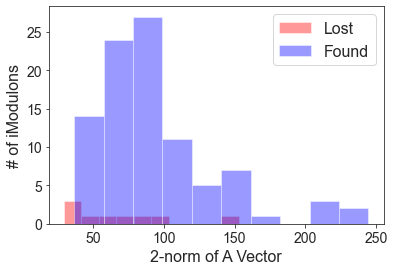

In [30]:
unique_norms = [np.linalg.norm(precise.A.loc[iM]) for iM in precise_unique]
both_norms = [np.linalg.norm(precise.A.loc[iM]) for iM in precise_both]

_, ax = plt.subplots()

ax.hist(unique_norms, color='red', alpha=0.4, label='Lost')
ax.hist(both_norms, color='blue', alpha=0.4, label='Found')
ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel('2-norm of A Vector', fontsize=16)
ax.set_ylabel('# of iModulons', fontsize=16)
ax.legend(fontsize=16)

plt.show()